##                                                 Distribution Plot

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


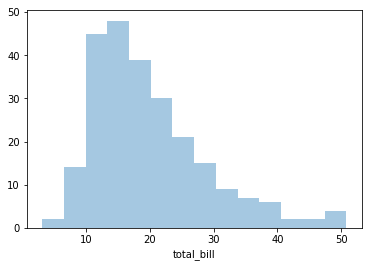

In [13]:
sns.distplot(tips['total_bill'], kde = False)

D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


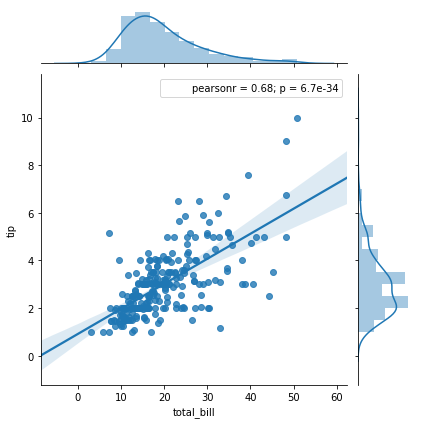

In [18]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

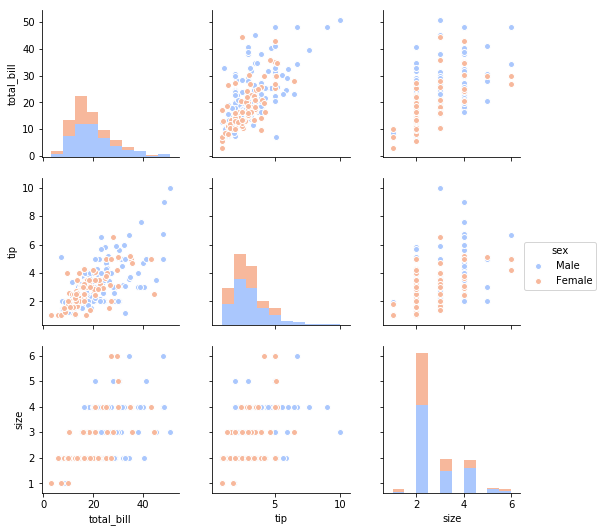

In [24]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

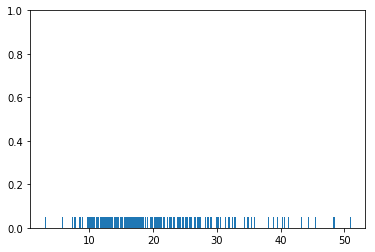

In [26]:
sns.rugplot(tips['total_bill'])

D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


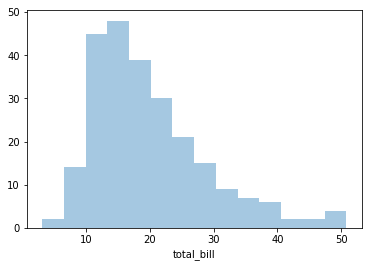

In [28]:
sns.distplot(tips['total_bill'], kde=False)

(0, 1)

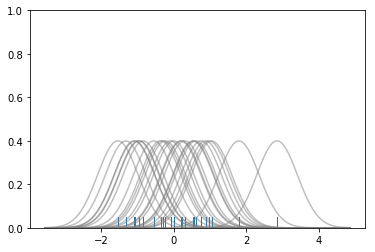

In [29]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

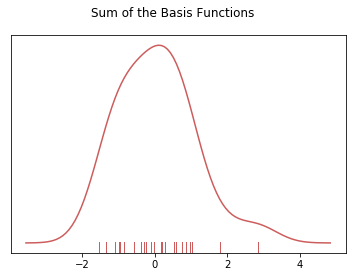

In [30]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

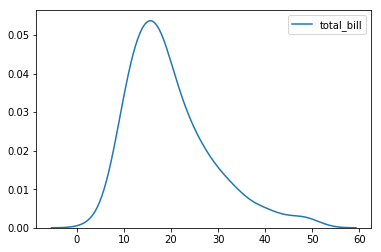

In [31]:
sns.kdeplot(tips['total_bill'])

###                                                                            Categorical Plot

In [35]:
import numpy as np

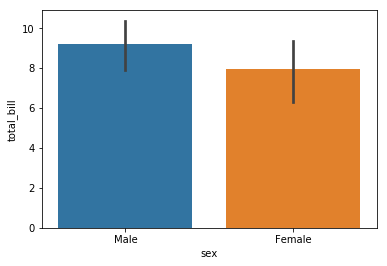

In [36]:
sns.barplot(x ='sex' , y = 'total_bill', data = tips, estimator=np.std)

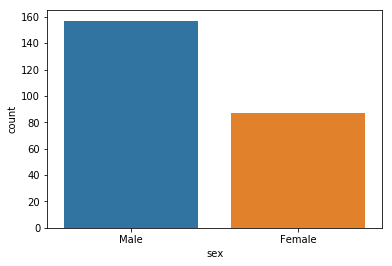

In [37]:
sns.countplot(x = 'sex', data = tips)

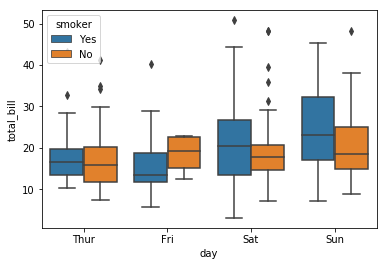

In [6]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue='smoker')

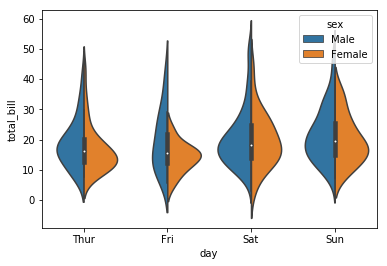

In [9]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', split = True)

D:\Program Files (x86)\Anaconda3\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


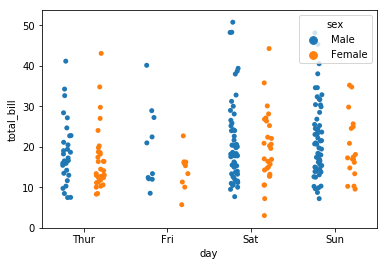

In [13]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True, hue = 'sex', split = True)

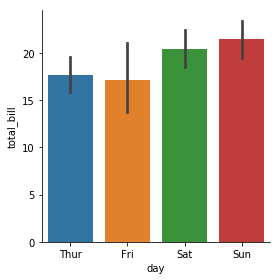

In [15]:
sns.factorplot(x = 'day', y = 'total_bill', data = tips, kind = 'bar')

####                                                                           Matrix plots

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [9]:
tc = tips.corr()

In [10]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


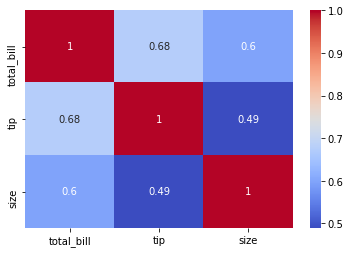

In [13]:
sns.heatmap(tc, annot=True, cmap = 'coolwarm')

In [17]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

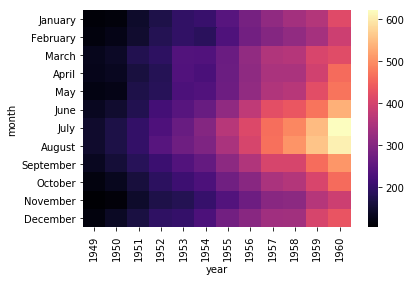

In [22]:
sns.heatmap(fp, cmap = 'magma', linecolor='white')

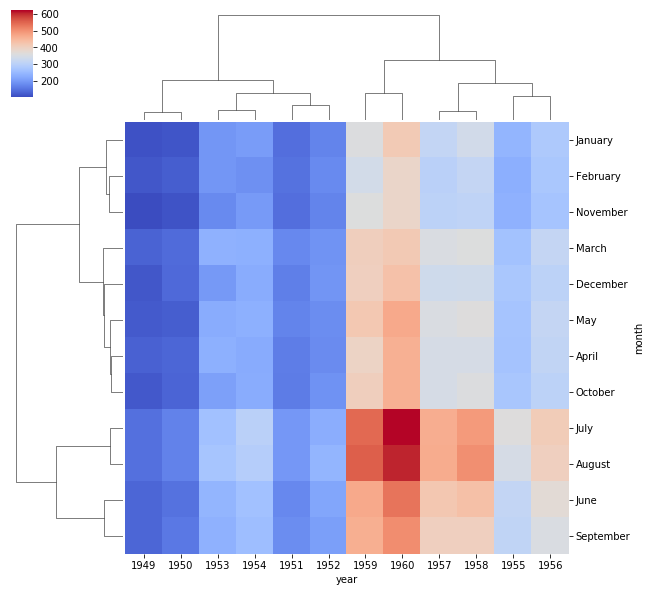

In [24]:
sns.clustermap(fp, cmap = 'coolwarm')

####                             Regeression Plot

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


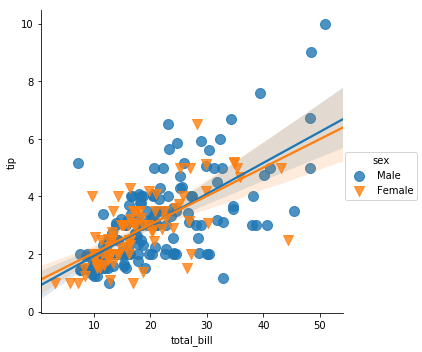

In [29]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers=['o', 'v'], scatter_kws={'s':100})

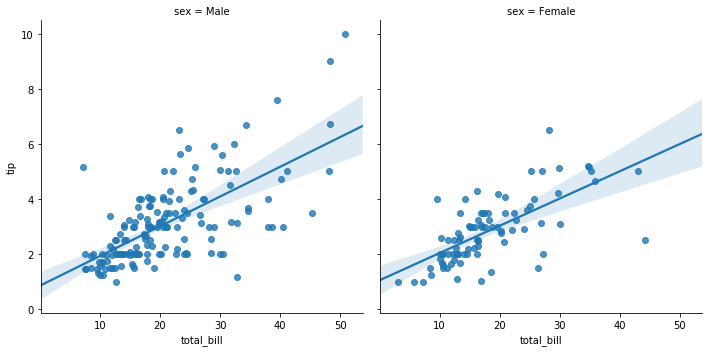

In [31]:
 sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col='sex')

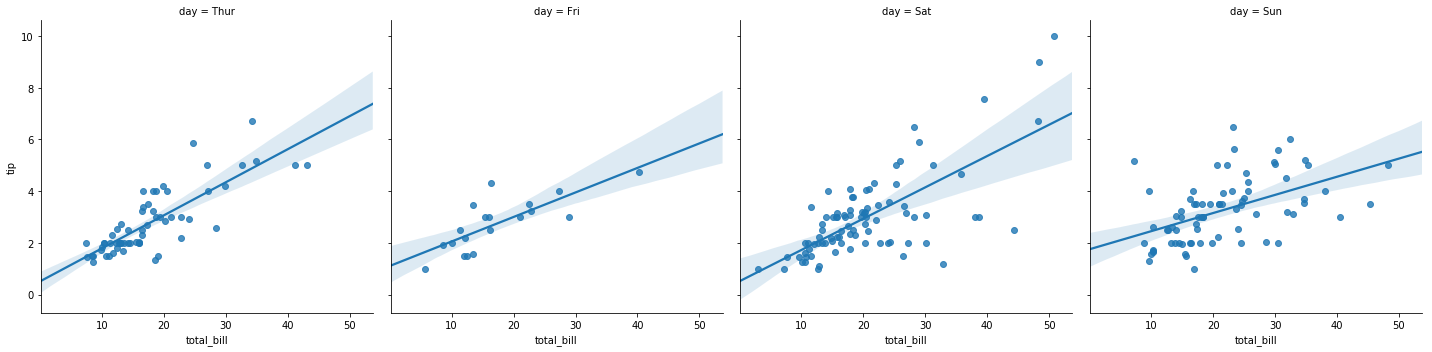

In [32]:
 sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col='day')

####                                                               Grids

In [33]:
iris = sns.load_dataset('iris')

In [34]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

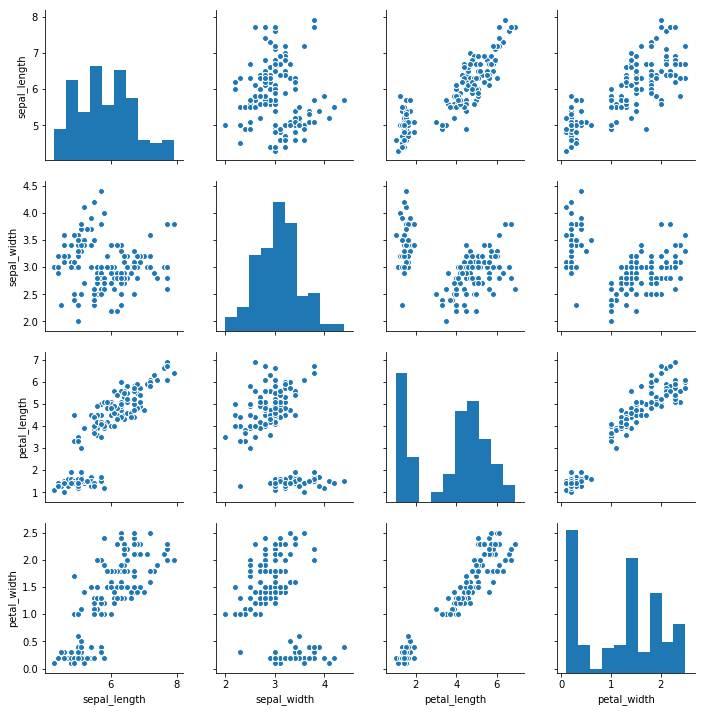

In [36]:
sns.pairplot(iris)

D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Program Files (x86)\Anaconda3\lib

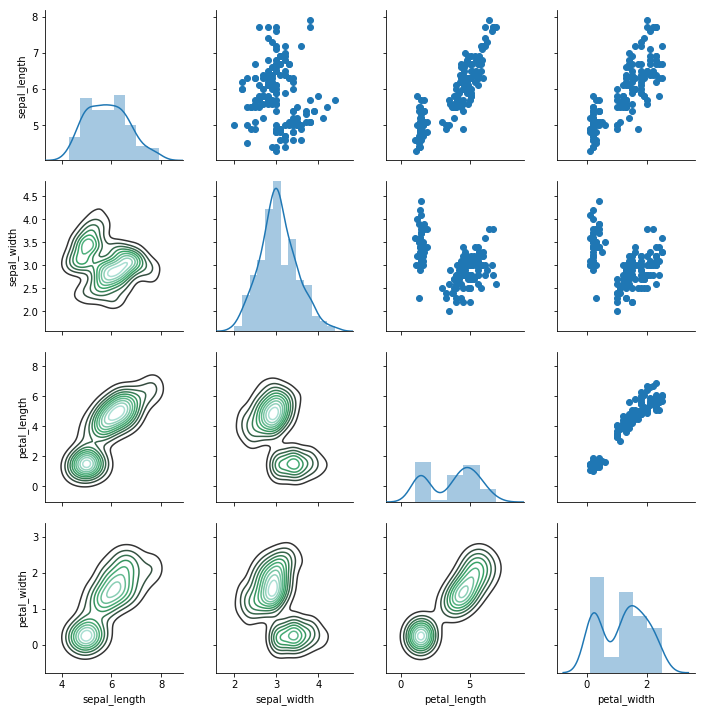

In [41]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [42]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


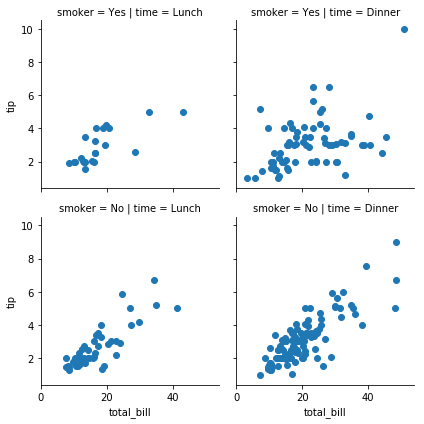

In [46]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(plt.scatter, 'total_bill', 'tip')

####                                    style and color

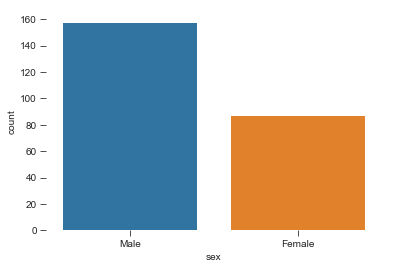

In [51]:
sns.set_style('ticks')
sns.countplot(x = 'sex', data = tips)
sns.despine(left = True, bottom=True)

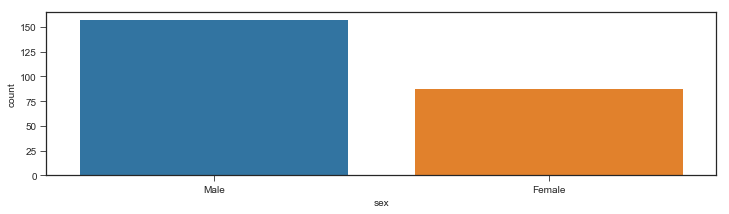

In [52]:
plt.figure(figsize=(12,3))
sns.countplot(x = 'sex', data = tips)

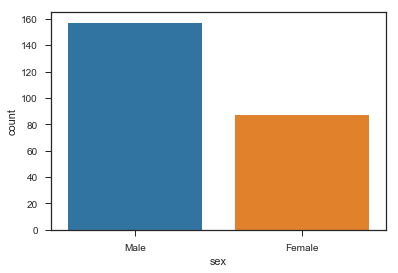

In [55]:
sns.set_context('notebook',)
sns.countplot(x = 'sex', data = tips)

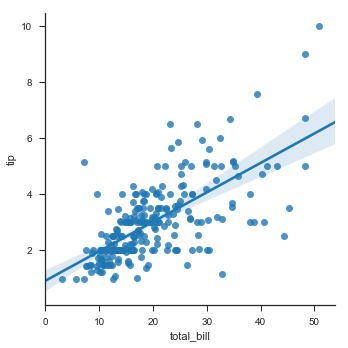

In [56]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)